Training set size: 60000
Test set size: 10000


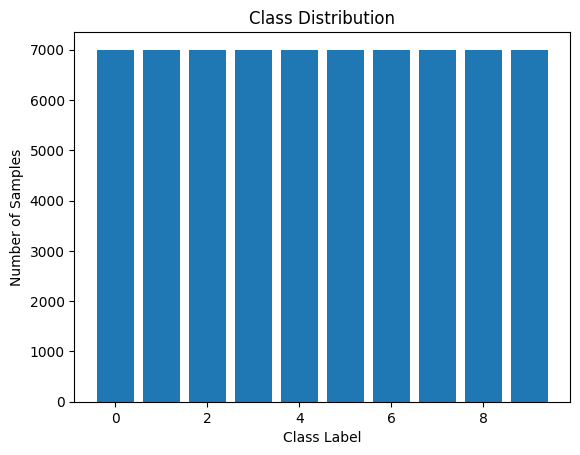

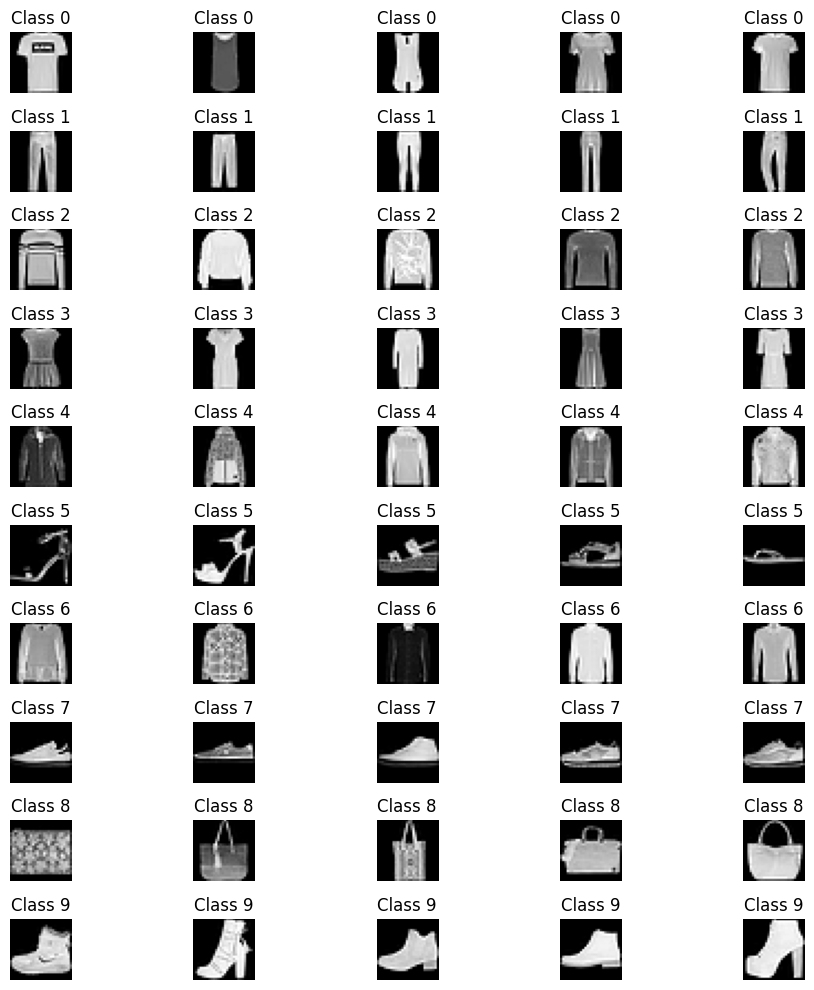

In [7]:
# Step 1: Data Exploration

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist

# Load the Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Print dataset size
print("Training set size:", x_train.shape[0])
print("Test set size:", x_test.shape[0])

# Show class distribution
class_labels, class_counts = np.unique(np.append(y_train,y_test), return_counts=True)
plt.bar(class_labels, class_counts)
plt.xlabel('Class Label')
plt.ylabel('Number of Samples')
plt.title('Class Distribution')
plt.show()

# Plot a few samples of each class
num_classes = len(class_labels)
samples_per_class = 5

plt.figure(figsize=(10, 10))
for i in range(num_classes):
    idx = np.where(y_train == i)[0][:samples_per_class]
    for j, sample_idx in enumerate(idx):
        plt.subplot(num_classes, samples_per_class, i * samples_per_class + j + 1)
        plt.imshow(x_train[sample_idx], cmap='gray')
        plt.title(f'Class {i}')
        plt.axis('off')
plt.tight_layout()
plt.show()


In [13]:
# Step 2: Pre-processing

import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Set random seed for reproducibility
np.random.seed(42)

# Split the training data into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Normalize the data
max_value = max(np.max(x_train),np.max(x_val),np.max(x_test))

x_train = x_train/ max_value
x_val = x_val / max_value
x_test = x_test / max_value

# Reshape the data to fit the model
x_train = np.expand_dims(x_train, axis=-1)
x_val = np.expand_dims(x_val, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

# Convert class vectors to binary class matrices
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_val = to_categorical(y_val, num_classes)
y_test = to_categorical(y_test, num_classes)




MemoryError: Unable to allocate 4.80 GiB for an array with shape (6441, 10, 10, 10, 10, 10) and data type float64

In [9]:
# Step 3: Define Initial Model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the model architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

# Print the model summary
model.summary()

# Define hyperparameters
learning_rate = 0.001
batch_size = 64
epochs = 10

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

print("Initial model architecture defined.")


c:\Users\detro\Desktop\School\3de bachelor\Modelleren en regelen van dynamische systemen\Python files MoReDyS\ENV\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

Initial model architecture defined.


Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6745 - loss: 0.8996 - val_accuracy: 0.8531 - val_loss: 0.3910
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.8463 - loss: 0.4329 - val_accuracy: 0.8764 - val_loss: 0.3329
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.8664 - loss: 0.3672 - val_accuracy: 0.8868 - val_loss: 0.2946
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.8826 - loss: 0.3232 - val_accuracy: 0.8957 - val_loss: 0.2810
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8917 - loss: 0.2959 - val_accuracy: 0.9001 - val_loss: 0.2626
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.8981 - loss: 0.2754 - val_accuracy: 0.9056 - val_loss: 0.2514
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9022 - loss: 0.2641 - val_accuracy: 0.9004 - val_loss: 0.2620
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9080 - loss: 0.2478 - val_accuracy: 0.

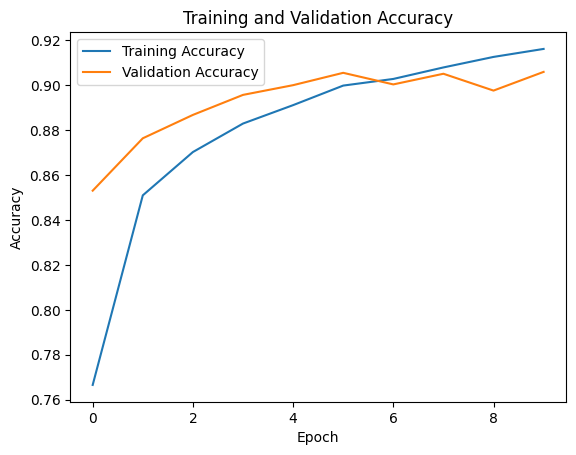

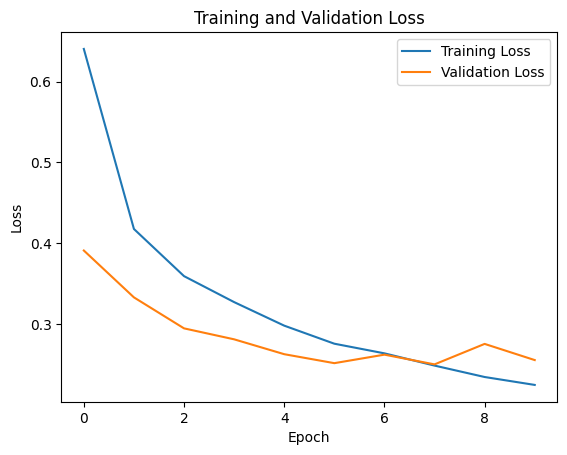

Training completed.


In [10]:
# Step 4: Train the Model

# Train the model
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_val, y_val))

# Plot training and validation curves
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

print("Training completed.")


In [12]:
# Step 5: Hyperparameter Tuning

import itertools

# Define different hyperparameters to tune
learning_rates = [0.001, 0.01, 0.1]
batch_sizes = [32, 64, 128]
epochs = [10, 20, 30]
optimizers = ['adam', 'sgd']

# Perform parameter search and store results in a CSV file
results = []

for lr, bs, ep, opt in itertools.product(learning_rates, batch_sizes, epochs, optimizers):
    # Define and compile model with current hyperparameters
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer=opt,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    # Train the model
    history = model.fit(x_train, y_train,
                        batch_size=bs,
                        epochs=ep,
                        verbose=0,
                        validation_data=(x_val, y_val))
    
    # Evaluate model on validation data
    loss, accuracy = model.evaluate(x_val, y_val, verbose=0)
    
    # Store results
    results.append({
        "learning_rate": lr,
        "batch_size": bs,
        "epochs": ep,
        "optimizer": opt,
        "validation_loss": loss,
        "validation_accuracy": accuracy
    })

# Convert results to DataFrame and save to CSV
results_df = pd.DataFrame(results)
results_df.to_csv("hyperparameter_tuning_results.csv", index=False)
print("Hyperparameter tuning completed. Results saved to hyperparameter_tuning_results.csv.")

# Display the results
print(results_df)



KeyboardInterrupt: 

In [ ]:
# Step 6: Test Final Model

# Re-train the final model using the full training dataset (including validation data)
final_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

final_model.compile(optimizer='adam',
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

final_model.fit(np.concatenate((x_train, x_val)), np.concatenate((y_train, y_val)),
                batch_size=batch_size,
                epochs=epochs,
                verbose=1)

# Evaluate the final model on the test dataset
test_loss, test_accuracy = final_model.evaluate(x_test, y_test, verbose=0)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Save the final model's weights
final_model.save_weights('final_model_weights.h5')
print("Final model weights saved.")

# Create a YAML file with the configuration of the final model
import yaml

model_config = final_model.get_config()
with open('final_model_config.yaml', 'w') as yaml_file:
    yaml_file.write(yaml.dump(model_config))
print("Final model configuration saved as YAML.")


In [ ]:
# Step 7: Load Configuration and Rebuild Model

# Load the model's configuration from the YAML file
with open('final_model_config.yaml', 'r') as yaml_file:
    loaded_model_config = yaml.safe_load(yaml_file)

# Rebuild the model from the loaded configuration
loaded_model = Sequential.from_config(loaded_model_config)

# Load the weights into the model
loaded_model.load_weights('final_model_weights.h5')
print("Model loaded and weights loaded.")

# Compile the loaded model (ensure it's compiled before evaluation)
loaded_model.compile(optimizer='adam',
                     loss='categorical_crossentropy',
                     metrics=['accuracy'])

# Evaluate the loaded model on the test dataset
loaded_model_test_loss, loaded_model_test_accuracy = loaded_model.evaluate(x_test, y_test, verbose=0)
print(f"Loaded Model Test Loss: {loaded_model_test_loss:.4f}")
print(f"Loaded Model Test Accuracy: {loaded_model_test_accuracy:.4f}")

# Plot random samples with correct and predicted labels
import random

# Choose random samples from the test set
num_samples_to_plot = 10
random_indices = random.sample(range(len(x_test)), num_samples_to_plot)
x_samples = x_test[random_indices]
y_true = np.argmax(y_test[random_indices], axis=1)
y_pred = np.argmax(loaded_model.predict(x_samples), axis=1)

# Plot the samples with correct and predicted labels
plt.figure(figsize=(15, 8))
for i in range(num_samples_to_plot):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_samples[i].reshape(28, 28), cmap='gray')
    plt.title(f"True: {y_true[i]}, Predicted: {y_pred[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()
